In [1]:
import numpy as np
import tensorflow as tf
from termcolor import colored
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
n_sample = 300
x_train = np.random.normal(0, 1, size=(n_sample, 1)).astype(np.float32)

# x_train의 값이 0 보다 같거나 크면 True, 작으면 False를 0, 1로 변환
y_train = (x_train >= 0).astype(np.float32)

print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

[[ 2.44017696e+00]
 [ 9.78477299e-02]
 [ 1.82682484e-01]
 [ 2.97917873e-01]
 [ 8.19981918e-02]
 [-1.08108830e+00]
 [ 1.29069373e-01]
 [ 1.33744448e-01]
 [ 5.12421489e-01]
 [-1.16586232e+00]
 [-1.19073629e+00]
 [-6.13375120e-02]
 [ 7.89361477e-01]
 [-7.74733186e-01]
 [ 1.02330530e+00]
 [ 8.12536359e-01]
 [ 7.35841453e-01]
 [ 8.81602645e-01]
 [ 4.18009698e-01]
 [-2.92538017e-01]
 [-5.65660357e-01]
 [ 4.79405642e-01]
 [ 1.92283320e+00]
 [-3.25740075e+00]
 [ 5.08058488e-01]
 [-8.54207039e-01]
 [ 4.41030078e-02]
 [-1.18760979e+00]
 [ 1.32753956e+00]
 [-6.14559114e-01]
 [-8.73098612e-01]
 [-1.38086510e+00]
 [ 1.54630280e+00]
 [-1.06703436e+00]
 [ 4.05613780e-01]
 [-1.06169522e+00]
 [-5.83092868e-01]
 [-1.97665131e+00]
 [-9.24117327e-01]
 [ 9.57159400e-01]
 [ 9.64730561e-01]
 [-4.95326847e-01]
 [ 1.21642806e-01]
 [ 1.08479404e+00]
 [-4.87817764e-01]
 [-1.20577824e+00]
 [-5.35371065e-01]
 [-2.22537684e+00]
 [ 2.41328716e+00]
 [ 1.80708551e+00]
 [ 1.97297108e+00]
 [ 3.31126601e-01]
 [ 2.8300887

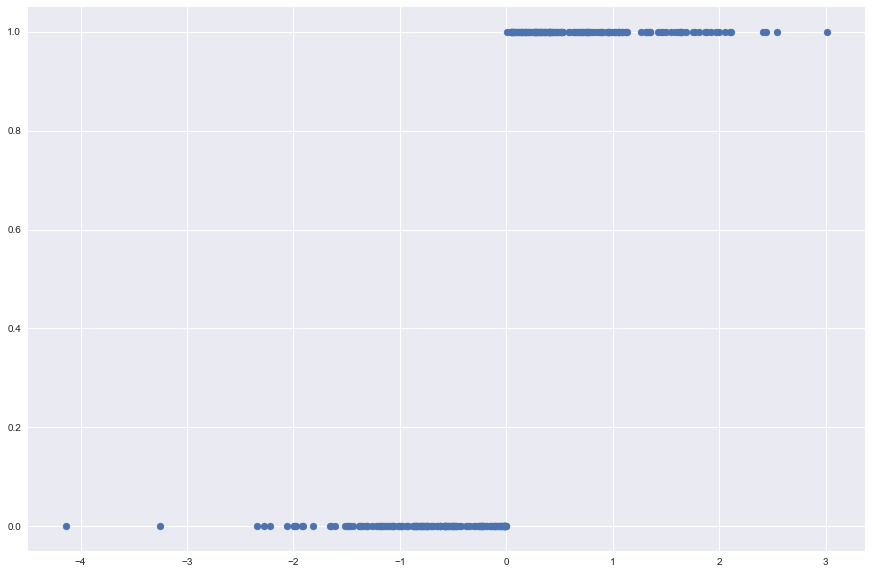

In [3]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize=10)

plt.show()

In [4]:
class classifier(tf.keras.Model):
  def __init__(self):
    super(classifier, self).__init__()
    
    self.d1 = tf.keras.layers.Dense(units=1, activation='sigmoid')
  
  def call(self, x):
    predictions = self.d1(x)
    return predictions

In [5]:
EPOCHS = 10
LR = 0.01

In [6]:
model = classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=LR)

loss_metric = tf.keras.metrics.Mean()
acc_metric = tf.keras.metrics.CategoricalAccuracy()

for epoch in range(EPOCHS):
  for x, y in zip(x_train, y_train):
    x = tf.reshape(x, (1, 1))
    y = tf.reshape(y, (1, 1))
    # print(x.shape, y.shape)
    
    with tf.GradientTape() as tape:
      predictions = model(x)
      loss = loss_object(y, predictions)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    """
    그냥 loss를 출력하면 한 번의 iteration의 마지막 loss만 출력하기 때문에 학습이 잘 이루어지고 있는지 정확하게 확인할 수 없다.
    그렇기 때문에 Mean() 메소드를 사용하여 평균을 구하여 출력한다.
    CategoricalAccuracy()는 one-hot encoding되어 있는 경우 정답률을 구하기 위해서 사용한다.
    """
    loss_metric(loss)
    acc_metric(y, predictions)
  
  print(colored('Epoch: ', 'cyan', 'on_white'), epoch + 1)
  
  template = 'Train Loss: {:.4f}\t Train Accuracy: {:.2f}%'
  ds_loss = loss_metric.result()
  ds_acc = acc_metric.result()
  
  print(template.format(ds_loss, ds_acc * 100))
  
  loss_metric.reset_states() # 반드시 해줘야함
  acc_metric.reset_states()

Epoch:  1
Train Loss: 0.5648	 Train Accuracy: 100.00%
Epoch:  2
Train Loss: 0.3960	 Train Accuracy: 100.00%
Epoch:  3
Train Loss: 0.3268	 Train Accuracy: 100.00%
Epoch:  4
Train Loss: 0.2873	 Train Accuracy: 100.00%
Epoch:  5
Train Loss: 0.2610	 Train Accuracy: 100.00%
Epoch:  6
Train Loss: 0.2419	 Train Accuracy: 100.00%
Epoch:  7
Train Loss: 0.2271	 Train Accuracy: 100.00%
Epoch:  8
Train Loss: 0.2153	 Train Accuracy: 100.00%
Epoch:  9
Train Loss: 0.2056	 Train Accuracy: 100.00%
Epoch:  10
Train Loss: 0.1973	 Train Accuracy: 100.00%


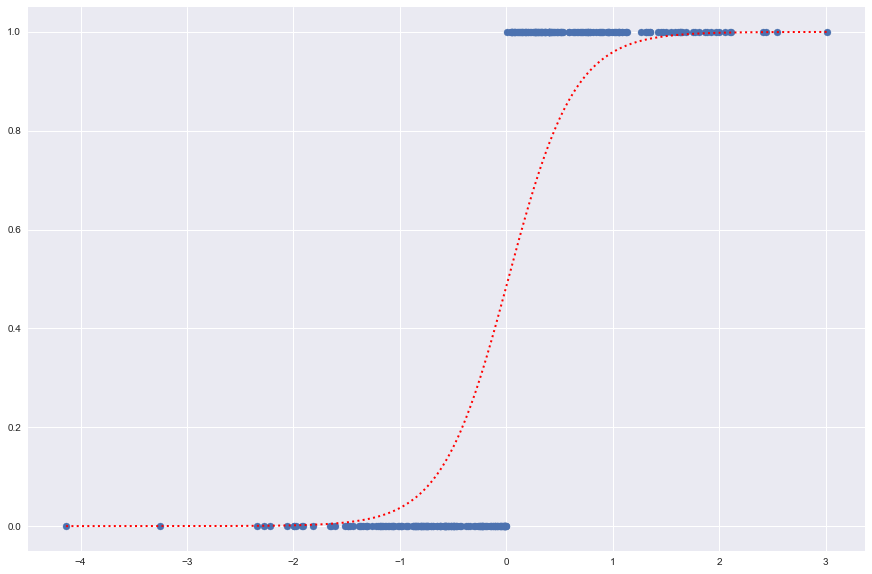

'\n0.5를 Decision Boundary로 크면 1 작으면 0으로 noise가 없기 때문에 완벽하게 classification 한 것을 확인할 수 있다.\n'

In [7]:
x_min, x_max = x_train.min(), x_train.max()

x_test = np.linspace(x_min, x_max, 300).astype(np.float32).reshape(-1, 1)

x_test_tf = tf.constant(x_test)
y_test_tf = model(x_test_tf)

x_result = x_test_tf.numpy()
y_result = y_test_tf.numpy()

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize=10)
ax.plot(x_result, y_result, 'r:', linewidth=2)

plt.show()

"""
0.5를 Decision Boundary로 크면 1, 작으면 0으로 noise가 없기 때문에 완벽하게 classification 한 것을 확인할 수 있다.
"""